# Resumen:

El siguiente notebook describe la exploración de un dataset para realización de un modelo de aprendizaje automático sobre un microcontrolador. Por medio de la plataforma Kaggle se obtuvo la base de datos que se usará para el entrenamiento del modelo, esta apunta a registrar dos datos relevantes que son el SoC y la temperatura de la batería de el automóvil BMW i3, haciendo uso de esta base de datos de apunta a la estimación de la temperatura de la batería y para ello por medio de la librería PyCaret se realiza el entramiento del modelo la cual permite la automatización del flujo de trabajo de ML.

# Marco Teórico:

## Descripción del conjunto de datos:

Las baterías de los vehículos eléctricos se enfrentan a variaciones debido a la variación de la conducción por parte del conductores, adicional a las cargas auxiliares que consumen energía para satisfacer sus funciones como lo son el sistema de calefacción y el aire acondicionado, esto genera una reducción significativa de la autonomía total del vehículo.

Haciendo uso de la plataforma Kaggle se realiza la busqueda de la base de datos que se implementará para el entrenamiento del modelo de nombre "SoC and Temperature Prediction".
En esta base de datos se registran 72 viajes reales con un BMW i3 los cuales comprenden el sistema de calefacción y de propulsión, cada viaje contiene datos relevantes del ambiente(temperatura, elevación, entre otros), datos del vehículo (aceleración, velocidad, entre otros), datos de batería(SoC, voltaje, corriente, temperatura), circuito de calefacción(temperatura interna, potencia de calefacción, entre otros).

Los datos están separados en múltiples archivos CSV separados por dos catergorías A y B, donde la primera se registró en verano la cual no contiene todos los datos presentados anteriormente en su totalidad debido a problemas en el sistema de medición, mientras que la categoría B es consistente con todos los datos que describe.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*Almacenamiento de la base de datos para ser tratada en una variable que representa la base.*

In [2]:
data = pd.read_csv('AllTrips.csv')

*Lectura de la base de datos, se puede observar que las últimas dos columnas contienen datos tipo NaN, por la tanto se debe hacer limpieza de estas.*

In [3]:
data

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C],Velocity [km/h]]],Unnamed: 23
0,0.0,0.0,575.0,0.0,0.0,-0.23,0.0,390.60,-13.10,8.0,...,16.02,15.85,1.97,3.28,5.11,3.02,1.97,5.64,NaN,NaN
1,0.1,0.0,575.0,0.0,0.0,-0.21,0.0,390.60,-13.10,8.0,...,16.02,15.85,1.97,3.28,5.11,3.02,1.97,5.64,NaN,NaN
2,0.2,0.0,575.0,0.0,0.0,-0.32,0.0,390.60,-13.10,8.0,...,16.02,15.85,1.97,3.28,5.11,3.02,1.97,5.64,NaN,NaN
3,0.3,0.0,575.0,0.0,0.0,-0.23,0.0,390.60,-13.10,8.0,...,16.02,15.85,1.97,3.28,5.11,3.02,1.97,5.64,NaN,NaN
4,0.4,0.0,575.0,0.0,0.0,-0.23,0.0,390.58,-13.17,8.0,...,16.02,15.87,1.97,3.27,5.11,3.02,1.97,5.64,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094788,1351.6,0.0,513.0,0.0,0.0,0.07,0.0,384.40,-0.70,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1094789,1351.7,0.0,513.0,0.0,0.0,0.07,0.0,384.40,-0.70,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1094790,1351.8,0.0,513.0,0.0,0.0,0.09,0.0,384.40,-0.70,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1094791,1351.9,0.0,513.0,0.0,0.0,0.11,0.0,384.40,-0.70,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Limpieza de las dos últimas columnas(Velocity [km/h]]] // Unnamed:23)*

In [4]:
data = data.iloc[: , :-2]

*El objetivo del entrenamiento será predecir la temperatura de la batería, por lo tanto se comprueba si dicha columna posee datos NaN, esta debe cumplir con que no posea datos faltantes para dicho objetivo.*

In [5]:
data['Battery Temperature [°C]'].isnull().values.any()

False

*Con el propósito de tener características relevantes sobre la característica de predicción, se realiza un plot de correlación el cual permite extraer cuáles son las características más relevantes sobre "Battery Temperature [°C]", con el propósito de escoger por lo menos las seis más relevantes, el mapa de calor de la correlación permite observar cuáles son más relevantes, en este caso se esocgerán las que tienen un valor mayor entre 0 a 1 para dicha característica.*

<AxesSubplot: >

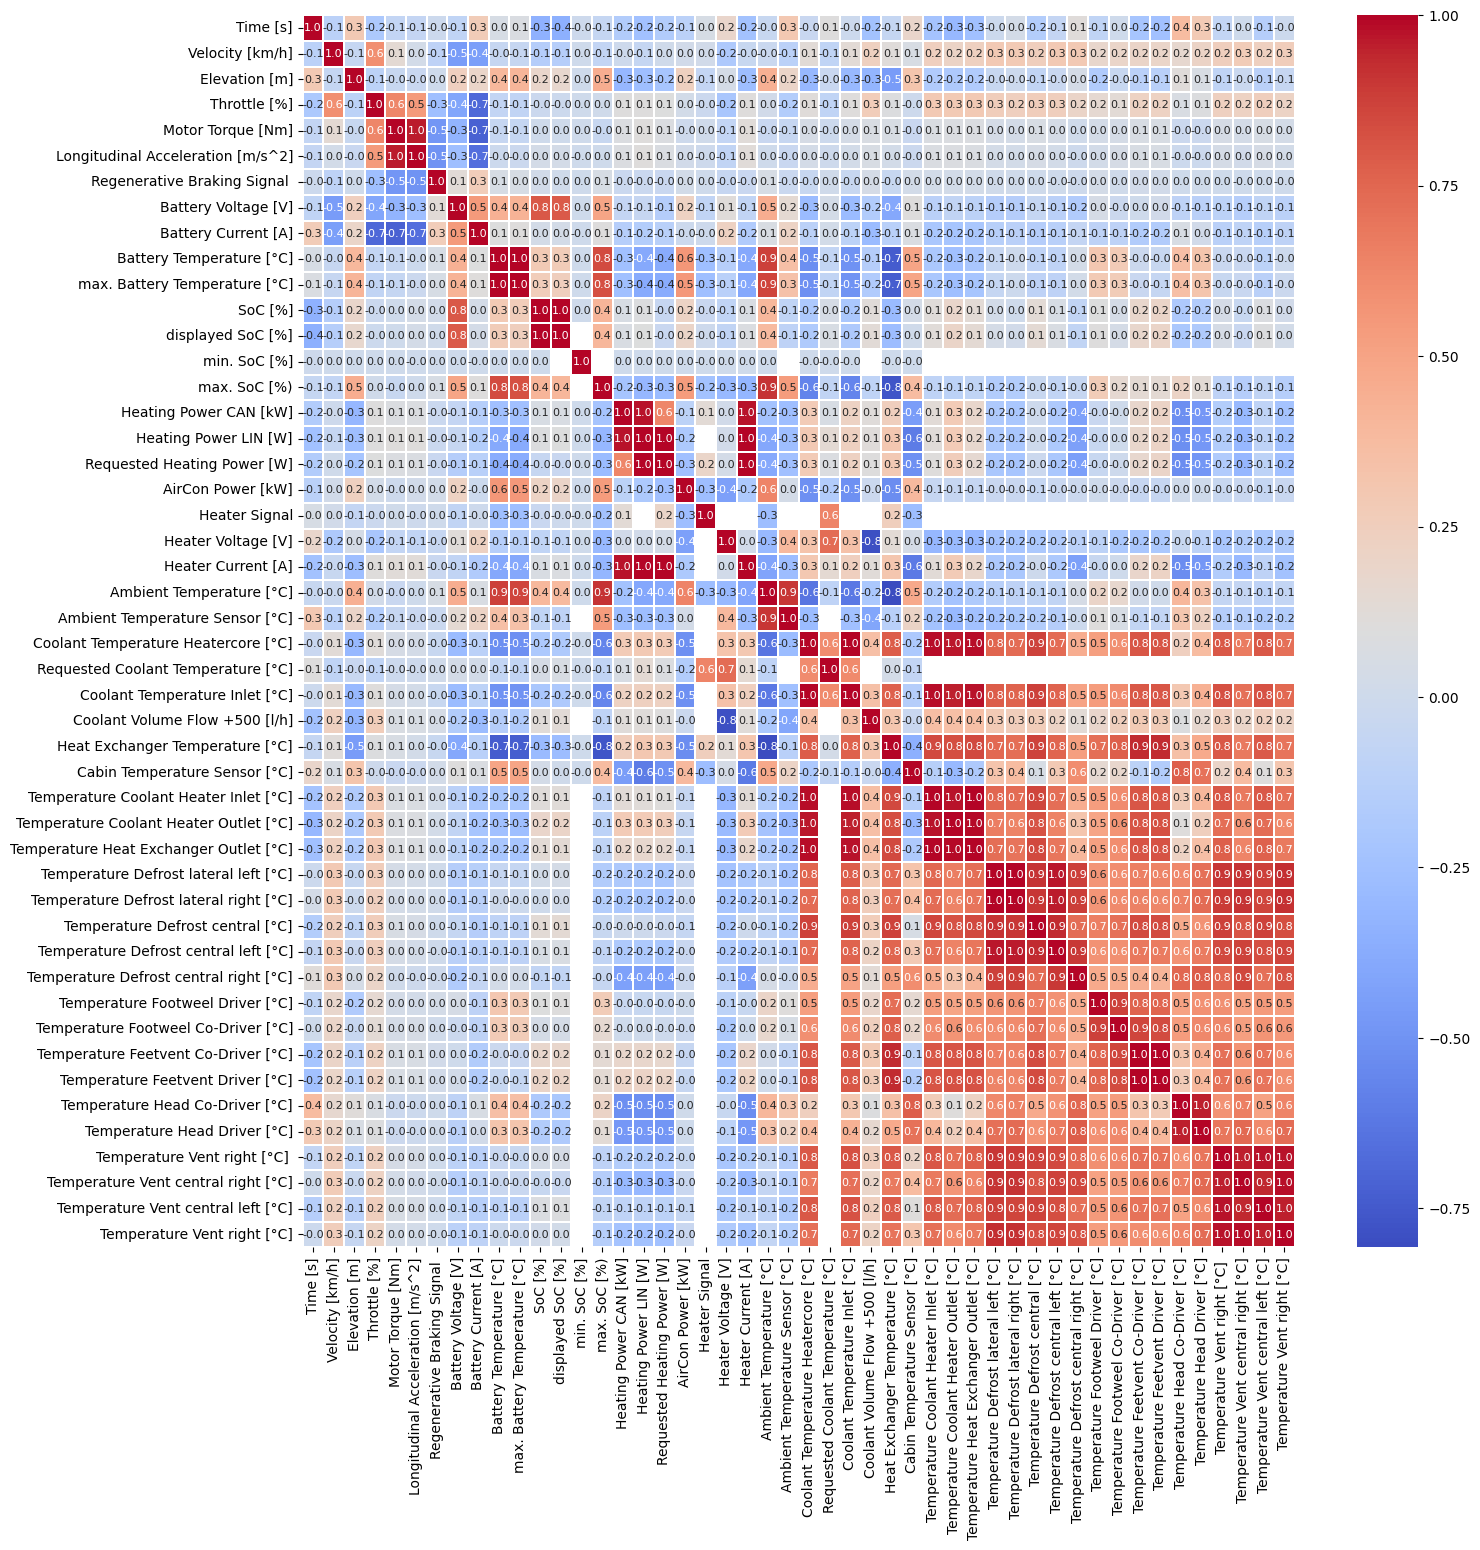

In [6]:
mat_corr = data.corr()

fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(mat_corr, annot = True, ax = ax, linewidths= .1, annot_kws={"fontsize":8}, fmt='.1f', cmap='coolwarm')

- Ambient Temperature [°C] - 0.9
- max. SoC [%) - 0.8
- AirCon Power [KW] - 0.6
- Cabin Temperature Sensor [°C] - 0.5
- Battery Voltage [V] - 0.4
- Elevation [m] - 0.4


*Reduciendo el dataset a las anteriores características seleccionadas y adicional en la última columna la característica de interés para la predicción, usando dropna() para eliminar filas que contienen datos nulos.*

In [7]:
data = data[['Ambient Temperature [°C]', 'max. SoC [%)', 'AirCon Power [kW]', 'Cabin Temperature Sensor [°C]', 'Battery Voltage [V]', 'Elevation [m]', 'Battery Temperature [°C]']].dropna()

In [8]:
data

,Ambient Temperature [°C],max. SoC [%),AirCon Power [kW],Cabin Temperature Sensor [°C],Battery Voltage [V],Elevation [m],Battery Temperature [°C]
0,-3.0,88.0,0.0,10.0,390.60,575.0,8.0
1,-3.0,88.0,0.0,10.0,390.60,575.0,8.0
2,-3.0,88.0,0.0,10.0,390.60,575.0,8.0
3,-3.0,88.0,0.0,10.0,390.60,575.0,8.0
4,-3.0,88.0,0.0,10.0,390.58,575.0,8.0
...,...,...,...,...,...,...,...
1094787,6.0,89.0,0.0,23.5,384.40,513.0,13.0
1094788,6.0,89.0,0.0,23.5,384.40,513.0,13.0
1094789,6.0,89.0,0.0,23.5,384.40,513.0,13.0
1094790,6.0,89.0,0.0,23.5,384.40,513.0,13.0


*Ahora bien, una vez limpio el conjunto de datos, se procede a hacer una descripción estadística de los datos recopilados en la base de datos, por ende se hace uso del método .describe() para observar dichas estadísticas.*

In [22]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature [°C],1063999.0,13.220542,9.705030,-3.50,5.00,9.50,22.00,33.50000
max. SoC [%),1063999.0,89.105845,0.634936,88.00,88.50,89.00,89.50,90.00000
AirCon Power [kW],1063999.0,0.169734,0.371787,-0.17,0.00,0.00,0.20,3.32000
Cabin Temperature Sensor [°C],1063999.0,23.957628,4.911754,10.00,22.67,24.17,25.84,39.84130
Battery Voltage [V],1063999.0,376.206370,11.800523,301.80,369.02,379.29,385.10,394.75852
Elevation [m],1063999.0,530.039007,42.313941,437.00,487.00,529.57,565.00,664.99000
Battery Temperature [°C],1063999.0,15.498859,7.512837,-1.00,9.00,15.00,21.00,32.00000


## Entrenamiento:

El objetivo del entrenamiento es la denominada Battery Temperature [°C] en la base de datos, por medio del uso del uso de la Regresión, haciendo uso de la librería PyCaret y aplicando la función 'setup', se permite configurar el objetivo del entrenamiento, esta por defecto entrena los modelos con el 70% para entrenamiento, por lo que ya se cumple con las restricciones planteadas por el proyecto de clase.

*Se puede observar información adicional como el tamaño del dataset y la cantidad de filas que contienen datos faltantes, estos no se eliminan ya que se encuentras dispersos y al sustraerlos se cortarían datos importantes que aportan otras características que no contienen datos faltantes en dichas columnas a eliminar*

In [23]:
from pycaret.regression import *
reg1 = setup(data, target = 'Battery Temperature [°C]', session_id=123, log_experiment=True, experiment_name='insurance1')

,Description,Value
0,Session id,123
1,Target,Battery Temperature [°C]
2,Target type,Regression
3,Original data shape,"(1063999, 7)"
4,Transformed data shape,"(1063999, 7)"
5,Transformed train set shape,"(744799, 7)"
6,Transformed test set shape,"(319200, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


*La función compare_models de PyCaret proporciona una amplia gama de modelos de aprendizaje automáticos predefinidos utilizando validación cruzada, uno de los parámetros configurados en esta ocasión ha sido el 'fold', el cual se refiere al número de pliegues utilizados para la validación cruzada, en este caso se usan 5, para evaluar el rendimiento de los modelos, el número de pliegues en la validación cruzada controla cuántas divisiones se hacen sobre los datos y cuántas iteraciones de entrenamiento y prueba se realizarán para evaluar el rendimiento del modelo,los datos se dividen en 5 partes iguales. Luego, el modelo se entrenará y probará 5 veces, utilizando una combinación diferente de 4 pliegues para entrenamiento y el pliegue restante para prueba en cada iteración.*

*Después de evaluar todos los modelos utilizando validación cruzada, compare_models() devuelve el mejor modelo basado en una métrica de rendimiento predeterminado, así generando un ranking que contiene medidas de error, siendo 2 de las incluídas, las solicitadas en el proyecto, RMSE y MAE, debido a que es un modelo de regresión el usado en esta ocasión.*

In [24]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0061,0.0057,0.0755,0.9999,0.0100,0.0008,18.0000
rf,Random Forest Regressor,0.0082,0.0108,0.1035,0.9998,0.0131,0.0011,32.5760
dt,Decision Tree Regressor,0.0064,0.0202,0.1418,0.9996,0.0172,0.0009,0.6900
knn,K Neighbors Regressor,0.0357,0.0786,0.2803,0.9986,0.0410,0.0056,0.9420
lightgbm,Light Gradient Boosting Machine,0.6532,0.9697,0.9847,0.9828,0.1281,0.0794,1.1960
gbr,Gradient Boosting Regressor,1.4591,4.4299,2.1047,0.9214,0.2552,0.1863,20.1440
ada,AdaBoost Regressor,2.2542,8.1556,2.8557,0.8554,0.3263,0.2947,10.3240
ridge,Ridge Regression,2.5868,12.1170,3.4809,0.7851,0.3577,0.3176,0.7220
br,Bayesian Ridge,2.5868,12.1170,3.4809,0.7851,0.3577,0.3176,0.1600
lr,Linear Regression,2.5868,12.1170,3.4809,0.7851,0.3577,0.3176,3.5660


In [29]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0061,0.0140,0.1183,0.9998,0.0158,0.0008
1,0.0054,0.0135,0.1162,0.9998,0.0136,0.0007
2,0.0057,0.0170,0.1303,0.9997,0.0138,0.0007
3,0.0060,0.0153,0.1239,0.9997,0.0149,0.0007
4,0.0053,0.0115,0.1070,0.9998,0.0144,0.0008
5,0.0070,0.0295,0.1717,0.9995,0.0208,0.0011
6,0.0053,0.0109,0.1043,0.9998,0.0129,0.0008
7,0.0054,0.0121,0.1099,0.9998,0.0123,0.0006
8,0.0058,0.0184,0.1355,0.9997,0.0178,0.0010


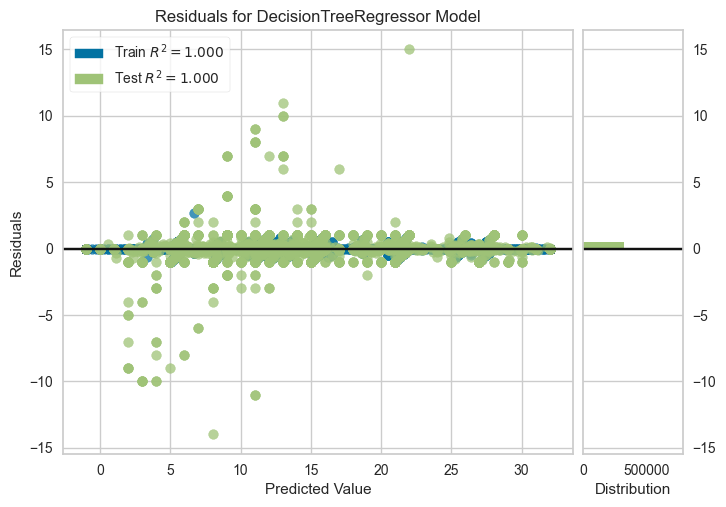

In [30]:
plot_model(dt)

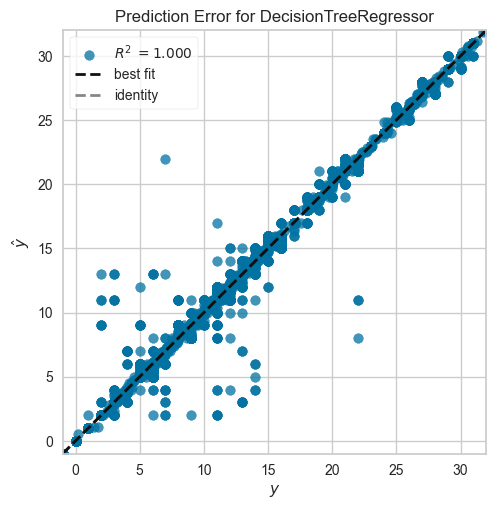

In [31]:
plot_model(dt, plot = 'error')

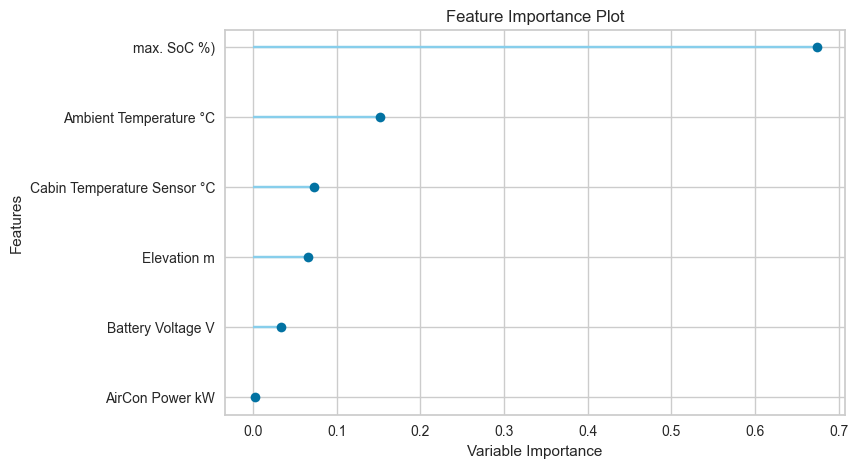

In [32]:
plot_model(dt, plot = 'feature')

*Se procede a hacer un split entre características y etiquetas, siendo un 70% para las características y el 30% restante para las etiquetas.*

In [9]:
train_dataset = data.sample(frac=0.7, random_state=0)
test_dataset = data.drop(train_dataset.index)

In [10]:
train_features = train_dataset.copy() #esta
test_features = test_dataset.copy()

train_labels = train_features.pop('Battery Temperature [°C]') #esta
test_labels = test_features.pop('Battery Temperature [°C]')

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from micromlgen import port

In [12]:
X = train_features.dropna()
y = train_labels.dropna()

*El conjunto de características 'X' resultante, no contiene la característica de interés a predecir, ya que esta se ubica en 'y' que corresponde al conjunto de etiquetas.*

In [13]:
X

,Ambient Temperature [°C],max. SoC [%),AirCon Power [kW],Cabin Temperature Sensor [°C],Battery Voltage [V],Elevation [m]
876959,18.5,90.0,0.00,20.5000,382.09000,553.34000
1018663,19.5,89.5,0.00,24.3382,391.09414,562.82362
824493,3.5,88.5,0.00,26.0100,364.71000,475.09000
959795,32.0,90.0,0.54,21.6700,392.94000,589.00000
297153,28.5,90.0,0.71,27.8400,388.88000,574.74000
...,...,...,...,...,...,...
591791,7.5,88.5,0.00,22.5000,372.40000,511.64000
845685,9.0,88.5,0.00,23.8400,380.59000,509.03000
742874,9.5,89.0,0.00,24.8383,375.54794,480.71878
589987,6.0,88.5,0.00,18.6300,380.97000,517.14000


In [42]:
y

876959     22.0
1018663    20.0
824493     15.0
959795     24.0
297153     26.0
           ... 
591791      6.0
845685     13.0
742874     11.0
589987      6.0
992399     30.0
Name: Battery Temperature [°C], Length: 744799, dtype: float64

In [43]:
if __name__ == '__main__':
    regr = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5).fit(X, y)
    #regr = RandomForestRegressor(n_estimators=10, max_depth=10, min_samples_leaf=5).fit(X, y)
    
    with open('DecisionTreeRegressor.h', 'w') as file:
        file.write(port(regr))

*Debido a que el método de mejor resultado en MSE y MAE es ExtraTreeRegressor, se hace uso de la librería emlearn que contiene dicho método para su entrenamiento haciendo uso de scikit learn, al final este entrega el archivo 'sonar.h' que contiene los pesos e instrucciones para el entrenamiento, posteriormente este archivo se usa para llevarlo a despliegue sobre el microcontrolador.*

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
estimator = ExtraTreesRegressor(n_estimators=4, max_depth=4)
estimator.fit(X, y)

ExtraTreesRegressor(max_depth=4, n_estimators=4)

In [20]:
import emlearn
cmodel = emlearn.convert(estimator, method='inline')
cmodel.save(file='sonar.h', name='sonar')

In file included from tmp/myinlinetree.c:2:
tmp/myinlinetree.h:148:34: warning: implicit conversion from 'double' to 'int32_t' (aka 'int') changes value from 2.405219799238491 to 2 [-Wliteral-conversion]
                          return 2.405219799238491;
                          ~~~~~~ ^~~~~~~~~~~~~~~~~
tmp/myinlinetree.h:150:34: warning: implicit conversion from 'double' to 'int32_t' (aka 'int') changes value from 5.505032960733735 to 5 [-Wliteral-conversion]
                          return 5.505032960733735;
                          ~~~~~~ ^~~~~~~~~~~~~~~~~
tmp/myinlinetree.h:154:34: warning: implicit conversion from 'double' to 'int32_t' (aka 'int') changes value from 7.015605958202467 to 7 [-Wliteral-conversion]
                          return 7.0156059582024675;
                          ~~~~~~ ^~~~~~~~~~~~~~~~~~
tmp/myinlinetree.h:156:34: warning: implicit conversion from 'double' to 'int32_t' (aka 'int') changes value from 9.808488521972051 to 9 [-Wliteral-conversion]
     

'\n\n\n    // !!! This file is generated using emlearn !!!\n\n    #include <eml_trees.h>\n    \n\nEmlTreesNode sonar_nodes[122] = {\n  { 1, 88.55441078755744, 1, 16 },\n  { 3, 25.32064694917002, 2, 9 },\n  { 3, 10.728672880789942, 3, 6 },\n  { 4, 365.20081207317764, 4, 5 },\n  { -1, 2.405219799238491, -1, -1 },\n  { -1, 5.505032960733735, -1, -1 },\n  { 0, 3.246664454344038, 7, 8 },\n  { -1, 7.0156059582024675, -1, -1 },\n  { -1, 9.808488521972052, -1, -1 },\n  { 4, 366.29026898210617, 10, 13 },\n  { 5, 498.3725691539848, 11, 12 },\n  { -1, 14.269893325645093, -1, -1 },\n  { -1, 9.536981526317536, -1, -1 },\n  { 3, 26.147103424934933, 14, 15 },\n  { -1, 13.30050499445061, -1, -1 },\n  { -1, 20.158089734432828, -1, -1 },\n  { 1, 89.34859085192373, 17, 24 },\n  { 3, 20.103064065595863, 18, 21 },\n  { 0, 4.911775493487611, 19, 20 },\n  { -1, 7.747749784048373, -1, -1 },\n  { -1, 11.077131911998846, -1, -1 },\n  { 0, 3.6196709964981633, 22, 23 },\n  { -1, 6.661072861668426, -1, -1 },\n  { 

*ahora bien, en el despliegue se requieren de algunas líneas de código para llevar al Arduino, estas fueron extraídas del ejemplo de implementación de 'emlearn', a continuación el código implementado sobre Arduino IDE:*

**NO EJECUTAR**

In [ ]:
#include "sonar.h"

unsigned long lastExecutionTime = 0;

void setup() {
  Serial.begin(115200);
}


void loop() {

  const float features[6] = { 6.0, 89.0, 0.0, 23.5, 384.40, 513.0 };

  unsigned long startTime = micros();

  const int32_t out = sonar_predict(features, 6);

  unsigned long executionTime = micros() - startTime;

  if (out < 0) {
    Serial.println("ERROR");
  } else {
    Serial.print("Estimated Battery Temperature [°C]:");
    Serial.println(out);
    Serial.print("Execution Time [micro seg]: ");
    Serial.println(executionTime);
  }
  delay(1000);
}

*El valor flotante definido como features se le hace ingreso de valores de las 6 características que se usaron para el conjunto 'X', estas fueron extraídas del dataset sobre una misma fila, con el objetivo de obtener una predicción de Battery Temperature [°C] de '13', adicional se toman tiempos entre cada cálculo de predicción por parte del microcontrolador, estas ejecuciones y tiempos son tomadas sobre los micros Arduino Nano 33 BLE y Arduino UNO R3 respectivamente, a continuación los resultados:*

# Conclusiones

1. El método de comparación por medio del uso de librerías que contienen diversos métodos de entrenamiento para la regresión o classificación aporta buenas estimaciones de cuál es el mejor modelo que contiene el menor error o tiempo de ejecución, a pesar de ser el caso, no siempre se correlaciona un mejor tiempo de entrenamiento con un mejor error como se observó con el Extra Tree Regressor.

2. Las características en el entrenamiento jugan un papel muy importante, y por dicha causa, las características que normalmente no tienen mucha relevancia en el modelo como se observó por medio del gráfico de correlacción, pueden causar que el modelo tienda a hacer underfitting y no predecir correcamente ya que muchas de estas características son "ruido" y no tan relevantes, lo mismo sucede en caso contrario cuando las características son demasiado relevantes que el modelo tiende a overfitting y será demasiado preciso aún con datos nuevos que apunten a un valor de predicción diferente respecto a los datos con los cuales fue entrenado.

3. Las características elegidas fueron escogidas con la razón de que son relevantes con respecto a la etiqueta de predicción pero que aún así no están altamente correlacionadas con dicha etiqueta de predicción, esto quiere decir que las característics que son altamente relacionadas a la temperatura son altamente relevantes y no signfica que sean las únicas que den un aporte significativo a la predicción de la etiqueta de Battery Temperature.